## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [33]:
# def partial_k(x, y, y_hat):
#     n = len(y)

#     gradient = 0
    
#     for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
#         gradient += (y_i - y_hat_i) * x_i
    
#     return -2 / n * gradient


# def partial_b(x, y, y_hat):
#     n = len(y)

#     gradient = 0
    
#     for y_i, y_hat_i in zip(list(y), list(y_hat)):
#         gradient += (y_i - y_hat_i)
    
#     return -2 / n * gradient

$$loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$$
$$if y_i > \hat(y_i)\frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum x_i$$
$$if y_i < \hat(y_i)\frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum x_i$$

$$if y_i > \hat(y_i)\frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum -1$$
$$if y_i < \hat(y_i)\frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum 1$$

In [49]:
def partial_k(x, y, y_hat):
    n = len(y)
    result = 0
    for x_i,y_i,y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            result += -x_i
        else:
            result += x_i
    return result / n

def partial_b(x, y, y_hat):
    n = len(y)
    result = 0
    for y_i,y_hat_i in zip( list(y), list(y_hat)):
        if y_i > y_hat_i:
            result += -1
        else:
            result += 1
    return result / n

In [50]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

In [51]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [57]:
from sklearn.datasets import load_boston
data = load_boston()
import random
X_rm = X[:, 5]
trying_times = 2000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02    #修改了学习率


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 81.41967890694613 best_b: -36.171861683761655, and the loss is: 207818.66411258953
When time is : 50, get best_k: 78.2773617132703 best_b: -36.671861683761556, and the loss is: 189665.10140738837
When time is : 100, get best_k: 75.13504451959446 best_b: -37.171861683761456, and the loss is: 172341.2570980417
When time is : 150, get best_k: 71.99272732591862 best_b: -37.67186168376136, and the loss is: 155847.13118454878
When time is : 200, get best_k: 68.85041013224279 best_b: -38.17186168376126, and the loss is: 140182.72366691034
When time is : 250, get best_k: 65.70809293856695 best_b: -38.67186168376116, and the loss is: 125348.03454512649
When time is : 300, get best_k: 62.56577574489111 best_b: -39.17186168376106, and the loss is: 111343.06381919666
When time is : 350, get best_k: 59.423458551215276 best_b: -39.67186168376096, and the loss is: 98167.81148912109
When time is : 400, get best_k: 56.28114135753944 best_b: -40.17186168376086, and the loss

### Part 3: Finish the Solution Parse Part of Edit-Distance(未完成)

理解：edit_distance 总体思路是动态规划。两个字符串对比 要使得两个字符串相等对每一个不同字符的位置的操作有三种可能 删除掉一个字符串，增加一个字符串，替换一个字符串，总体思想及时每次操作下一个时 操作它前面字符的操作次数 等于之前所有可能操作的最小值，以此累推下去 即可得到最短的距离"

In [4]:
solution = {}

In [5]:
from functools import lru_cache
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [6]:
edit_distance('ABCDE', 'ABCCEF')

2

In [7]:
edit_distance('ATCGGAA', 'ATCGGGA')

1

In [8]:
def Levenshtein_Distance_Recursive(str1, str2):

    if len(str1) == 0:
        return len(str2)
    elif len(str2) == 0:
        return len(str1)
    elif str1 == str2:
        return 0

    if str1[len(str1)-1] == str2[len(str2)-1]:
        d = 0
    else:
        d = 1
    
    return min(Levenshtein_Distance_Recursive(str1, str2[:-1]) + 1,
                Levenshtein_Distance_Recursive(str1[:-1], str2) + 1,
                Levenshtein_Distance_Recursive(str1[:-1], str2[:-1]) + d)


In [9]:
print(Levenshtein_Distance_Recursive("abc", "bd"))

2


### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:使用导数，可以确定正确的下降方向并且下降速度最快

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度指导数，下降指沿着导数方向减小权重大小


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:下降方向和下降速度

4. Using the simple words to describe: What's the machine leanring.¶

Ans:利用数据机器拟合出正确函数

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans：

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

0-1背包问题、最长公共序列数、最短路径

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

$最优子结构：问题的最优解所包含的子问题的解也是最优的$
$重叠子问题：自顶向下对问题进行求解时，每次产生的子问题并不总是新问题，有些子问题会被重复计算多次。动态规划算法对每一个子问题只计算一次，然后$          $将其计算结果保存在一个表格中，当再次需要计算已经计算过的子问题时，只是在表格中简单地查看一下结果，从而获得较高的效率。$
$无后效性：  即某阶段状态一旦确定，就不受这个状态以后决策的影响。也就是说，某状态以后的过程不会影响以前的状态，只与当前状态有关$

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

$不同问题的阶段划分、状态识别等内容常需要不同的方法，无统一方法。没有统一的标准模型$
$存在“维数障碍”$

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

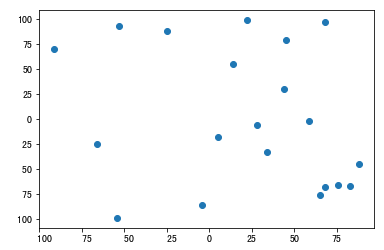

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

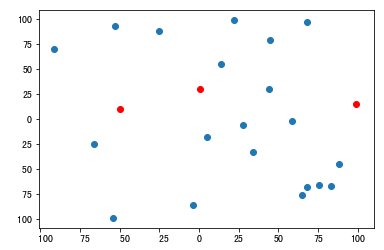

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro